# Modelo de regresión logística

## 1. Exploración inicial

### 1.1 Importación de librerías necesarias para el análisis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import math
import warnings
warnings.filterwarnings('ignore')

### 1.2 Lectura del archivo csv

In [4]:
#Leer el archivo con el método read de pandas
data = pd.read_csv('../../data/healthcaredatasetstrokedata.csv')

In [5]:
#Visualizar los primeros 5 registros del dataset
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
#Visualizar los últimos 5 registros del dataset
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
#Visualizar los nombres de las columnas
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
#Visualizar el tipo de dato de las columnas
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### 1.3 Análisis exploratorio de los datos

<div style="text-align:justify; line-height: 1.9; ">

Se utilizará el método info() para identificar valores faltantes, comprender el tipo de dato de cada una de nuestras variables y empezar a planear la limpieza y el preprocesamiento de los datos.

</div>

In [9]:
#Información relevante sobre cada una de las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<div style="text-align:justify; line-height: 1.9; ">

El resultado anterior refleja la presencia de valores nulos en la variable bmi, este es el índice de masa corporal. 

A continuación, se realizará un análisis estadístico descriptivo del dataset utilizando el método describe(). Este procedimiento proporciona una visión general de las variables numéricas, incluyendo métricas como la media, desviación estándar, valores mínimo y máximo, así como los percentiles. Estos indicadores permiten identificar distribuciones sesgadas, posibles anomalías o valores atípicos. Además, el conteo de valores por columna puede servir como una primera aproximación para detectar la presencia de valores nulos, ya que cualquier discrepancia con el total de registros podría indicar datos faltantes.

</div>

In [10]:
#Análisis descriptivo de la base de datos
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<div style="text-align:justify; line-height: 1.9; ">

Observaciones:

- **Edad** El promedio de edad entre todas las personas registradas en el dataset es de 43.22 años. 

- **Hipertensión** Cerca del 9.7 % de la población registrada tiene hipertensión.

- **Enfermedad** cardíaca Solo el 5.4 % de la población registrada presenta una condición de este tipo.

- **Nivel promedio de glucosa** El promedio de glucosa en la sangre de la población registrada es de 106.15 mg/dL. Y el rango de los registrados va desde un mínimo de 55.12 mg/dL hasta un máximo de 271.73 mg/dL

- **Índice de masa corporal** La media y la mediana estan cercanas a 28, lo que según la OMS indica una tendencia general hacia el sobrepeso (IMC entre 25 y 30), esto sugiere que la mayoría de la población registrada no se encuentra en un rango saludable de peso. Además encontramos datos mínimos de 10 y máximos de 97, lo que indica que hay personas con desnutrición severa, probablemente casos clínicos graves y personas con lo que se calificaria como un caso de obesidad morbida extrema, estos valores extremos pueden tratarse de casos reales.

- **Accidente cerebrovascular** Solo un 4.9 % de la población registrada a sufrido un accidente cerebrovascular.

</div>

#### Registros duplicados

In [11]:
#Presentar la suma de registros duplicados
data.duplicated().sum()

np.int64(0)

#### Valores nulos

<div style="text-align:justify; line-height: 1.9; ">

En esta etapa del análisis exploratorio, se evaluó la existencia de valores nulos en el conjunto de datos mediante la función data.isnull().sum(), la cual permite contar cuántos valores faltantes existen en cada columna. Los resultados muestran que la única columna con valores nulos es bmi, con un total de 201 registros faltantes.

</div>

In [12]:
#Sumar la cantidad de valores nulos que hay por columna
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<div style="text-align:justify; line-height: 1.9; ">

A continuación, se calculó el porcentaje que estos valores nulos representan respecto al total de observaciones en el dataset. Considerando que el dataset contiene 5110 registros, los 201 valores faltantes en la variable bmi equivalen aproximadamente al 3.93% del total. Este porcentaje es relativamente bajo, por lo que no se justifica la eliminación de toda la columna ni de todos los registros afectados. En su lugar, se aplicará una estrategia de imputación que se detalla más adelante.

</div>

In [13]:
#Calculando el porcentaje que reflejan los valores nulos en el dataset
total = data.shape[0]
non_nulls = data['bmi'].count()
nulls = total - non_nulls
percentage_nulls = (nulls/total)*100
print(f"{percentage_nulls:.2f}%")

3.93%


<div style="text-align:justify; line-height: 1.9; ">

Se utilizó un heatmap para visualizar gráficamente la ubicación de los valores nulos en el dataset. Esta representación visual confirma que los nulos se encuentran únicamente en la columna bmi.

</div>

<Axes: >

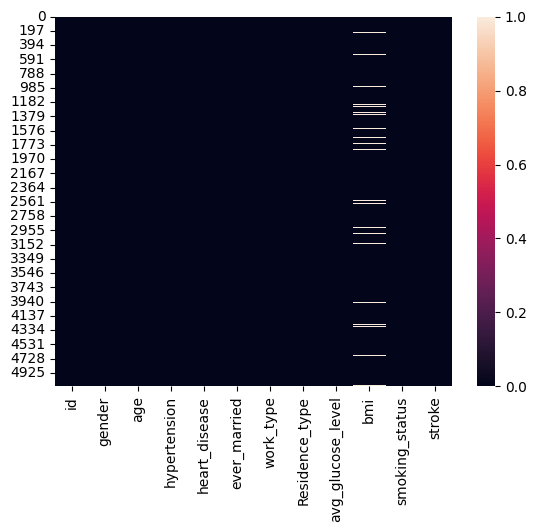

In [14]:
#Creando visualización de valores nulos
sns.heatmap(data.isnull())

#### Valores extremos

<div style="text-align:justify; line-height: 1.9; ">

En esta sección se realiza un análisis gráfico de los valores extremos (outliers) presentes en las variables numéricas del conjunto de datos, excluyendo aquellas que representan identificadores o variables categóricas binarias como id, stroke, heart_disease e hypertension. Para ello, se utilizaron diagramas de caja, los cuales permiten visualizar la distribución de los datos y detectar posibles valores atípicos de forma clara.

</div>

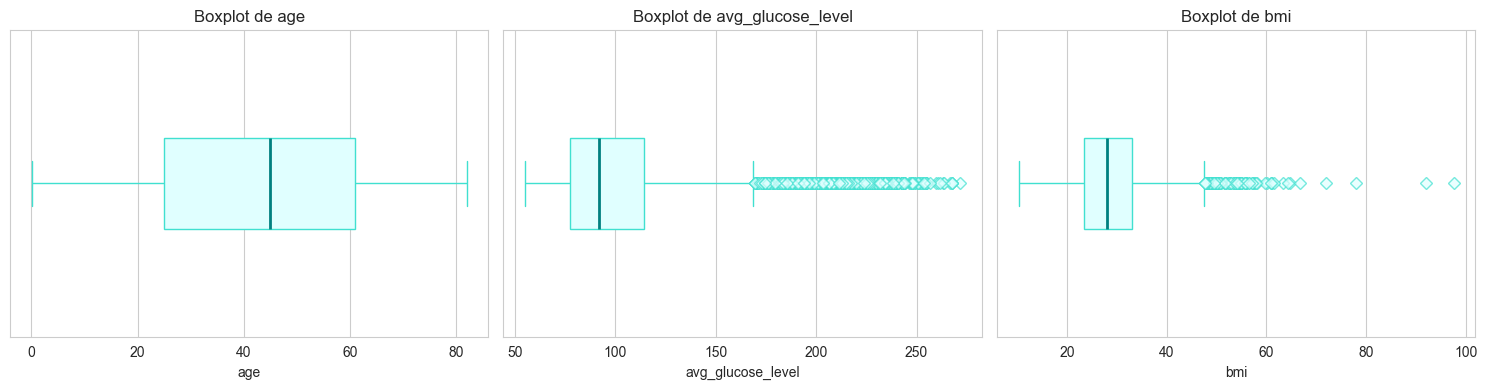

In [15]:
sns.set_style("whitegrid")

#Filtrando las oclumnas que utilizaremos para graficar el diagrama de cajas
numeric_columns = data.select_dtypes(include='number').columns

numeric_columns =  numeric_columns.drop(['stroke','heart_disease','hypertension','id'])

# Define la cantidad de columnas en la cuadrícula de subplots
n_cols = 3
# Calcula el número necesario de filas para acomodar todos los gráficos
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  

# Crea una figura y una cuadrícula de subplots con el tamaño adecuado
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

# Convierte el arreglo 2D de ejes en una lista plana para facilitar la iteración
axes = axes.flatten() 

# Itera sobre cada columna numérica seleccionada para crear su respectivo boxplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(
        x=data[column].dropna(),
        ax=axes[i],
        width=0.3,
        boxprops=dict(facecolor='lightcyan', edgecolor='turquoise'),
        medianprops=dict(color='teal', linewidth=2),
        whiskerprops=dict(color='turquoise'),
        capprops=dict(color='turquoise'),
        flierprops=dict(marker='D', markerfacecolor='lightcyan', markeredgecolor='turquoise', alpha=0.7)
    )
    # Título y etiqueta del eje x
    axes[i].set_title(f'Boxplot de {column}', fontsize=12)
    axes[i].set_xlabel(column)


# Elimina cualquier subplot restante que no se haya usado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajusta el diseño de los subplots para evitar superposiciones
plt.tight_layout()

# Muestra los gráficos
plt.show()

<div style="text-align:justify; line-height: 1.9; ">

Para identificar la cantidad de outliers en las variables numéricas del conjunto de datos y sus valores exactos, se utilizó el método del **rango intercuartílico (IQR)**. Este enfoque se basa en calcular el primer cuartil y el tercer cuartil de cada variable, y a partir de estos obtener el IQR como:

$$
\text{IQR} = Q_3 - Q_1
$$

Luego, se establecen los límites inferior y superior para detectar valores extremos utilizando las siguientes fórmulas:

$$
\text{Límite inferior} = Q_1 - 1.5 \times \text{IQR}
$$

$$
\text{Límite superior} = Q_3 + 1.5 \times \text{IQR}
$$

</div>


In [16]:
#Seleccionar solo las columnas numéricas de nuestro dataset, .columns obtiene solo los nombres de esas columnas.
numeric_columns = data.select_dtypes(include='number').drop(columns=['hypertension','heart_disease','stroke']).columns

#Diccionario para guardar outliers por columna, la clave es el nombre de la columna, y el valor la lista de outliers.
outliers_dict = {}

#Iterar sobre cada nombre de columna de las columnas numéricas
for column in numeric_columns:
    #Extrae la columna como una Serie de pandas
    data_outliers = data[column]
    #Con el método quantile calculamos el primer cuartil
    Q1 = data_outliers.quantile(0.25)
    #Calculamos el tercer cuartil
    Q3 = data_outliers.quantile(0.75)
    #Calulamos el rango intercuartílico
    IQR = Q3 - Q1
    #Caluclamos el límite inferior
    lower_bound = Q1-1.5*IQR
    #Calculamos el límite superior
    upper_bound = Q3+1.5*IQR
    #Filtrar los valores que se encuentran fuera del intervalo, estos son los considerados outliers
    outliers = data_outliers[(data_outliers<lower_bound)|(data_outliers>upper_bound)]

    #Verifica si hay outliers
    if not outliers.empty:
        #Guarda cada clave (nombre de la columna) con su valor (lista de outliers)
        outliers_dict[column] = outliers.to_list()

#Recorrer el diccionario para imprimir los outliers
for column_name, values in outliers_dict.items():
    print(f"{column_name} → {len(values)} outliers: {values[:10]}{'...' if len(values) > 10 else ''}")

avg_glucose_level → 627 outliers: [228.69, 202.21, 171.23, 174.12, 186.21, 219.84, 214.09, 191.61, 221.29, 217.08]...
bmi → 110 outliers: [48.9, 56.6, 50.1, 54.6, 60.9, 54.7, 48.2, 64.8, 54.7, 49.8]...


<div style="text-align:justify; line-height: 1.9; ">

En el caso de la variable avg_glucose_level, se identificaron 627 valores atípicos según el rango intercuartílico. Sin embargo, **estos no serán eliminados del análisis** ya que corresponden a niveles de glucosa que son clínicamente posibles. En contextos médicos, es común encontrar pacientes con hiperglucemia severa, especialmente entre personas con diabetes no controlada. Por tanto, remover estos registros implicaría perder información valiosa sobre individuos con condiciones de salud relevantes que el modelo debe ser capaz de identificar y aprender. 

Respecto a la variable bmi, se detectaron 110 valores atípicos. Aunque estos valores se alejan de la distribución típica, **tampoco serán descartados**. Existen personas con índices de masa corporal significativamente elevados debido a condiciones como la obesidad mórbida, o bien, con valores bajos por trastornos de alimentación u otros problemas de salud. Estos casos son reales y clínicamente importantes. Dado que uno de los objetivos del análisis es identificar patrones asociados a riesgos de salud, es fundamental conservar estos datos para no sesgar el análisis hacia un subconjunto de la población más saludable.

</div>

### 1.4 Limpieza de los datos

<div style="text-align:justify; line-height: 1.9; ">

Debido a que no encontramos registros duplicados, y mantendremos los outliers debido a las razones explicadas anteriormente, nuestra limpieza será únicamente el tratamiento de valores nulos.

Para iniciar el proceso de limpieza, se realizó una copia del DataFrame original utilizando df = data.copy(). Esta práctica es fundamental para preservar la integridad de los datos originales y evitar modificaciones accidentales sobre el conjunto de datos inicial. Trabajar con una copia nos permite aplicar transformaciones, pruebas y preprocesamiento sin riesgo de perder información o alterar datos que podrían ser necesarios en futuras comparaciones o análisis.

</div>

In [17]:
#Creando una copia del DataFrame original
df = data.copy()

<div style="text-align:justify; line-height: 1.9; ">

A continuación, se realizó la imputación de valores nulos en la variable bmi, que contenía registros faltantes. Para ello, se utilizó la clase SimpleImputer de la biblioteca sklearn.impute, configurada con la estrategia 'mean', la cual reemplaza los valores faltantes con la media de la columna.

</div>

In [18]:
#clase que permite reemplazar los valores NaN por una estrategia determinada
from sklearn.impute import SimpleImputer
#Se crea una instancia del imputador y se indica que la estrategia utilizada será la media.
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
#Se aplica el imputador a la columna bmi
df['bmi'] = imputer.fit_transform(df[['bmi']])

### 1.5 Distribuciones de las variables

<div style="text-align:justify; line-height: 1.9; ">

Como parte del análisis exploratorio de datos, se realizó la visualización de la distribución de cada una de las variables numéricas y categóricas binarias del dataset. Esto permite comprender la forma en la que se distribuyen los datos, identificar posibles sesgos, asimetrías y la necesidad de realizar transformaciones o ajustes adicionales. Para ello se utilizaron histogramas con curvas de densidad suavizada que ofrecen una visión clara de la forma de cada variable.

</div>

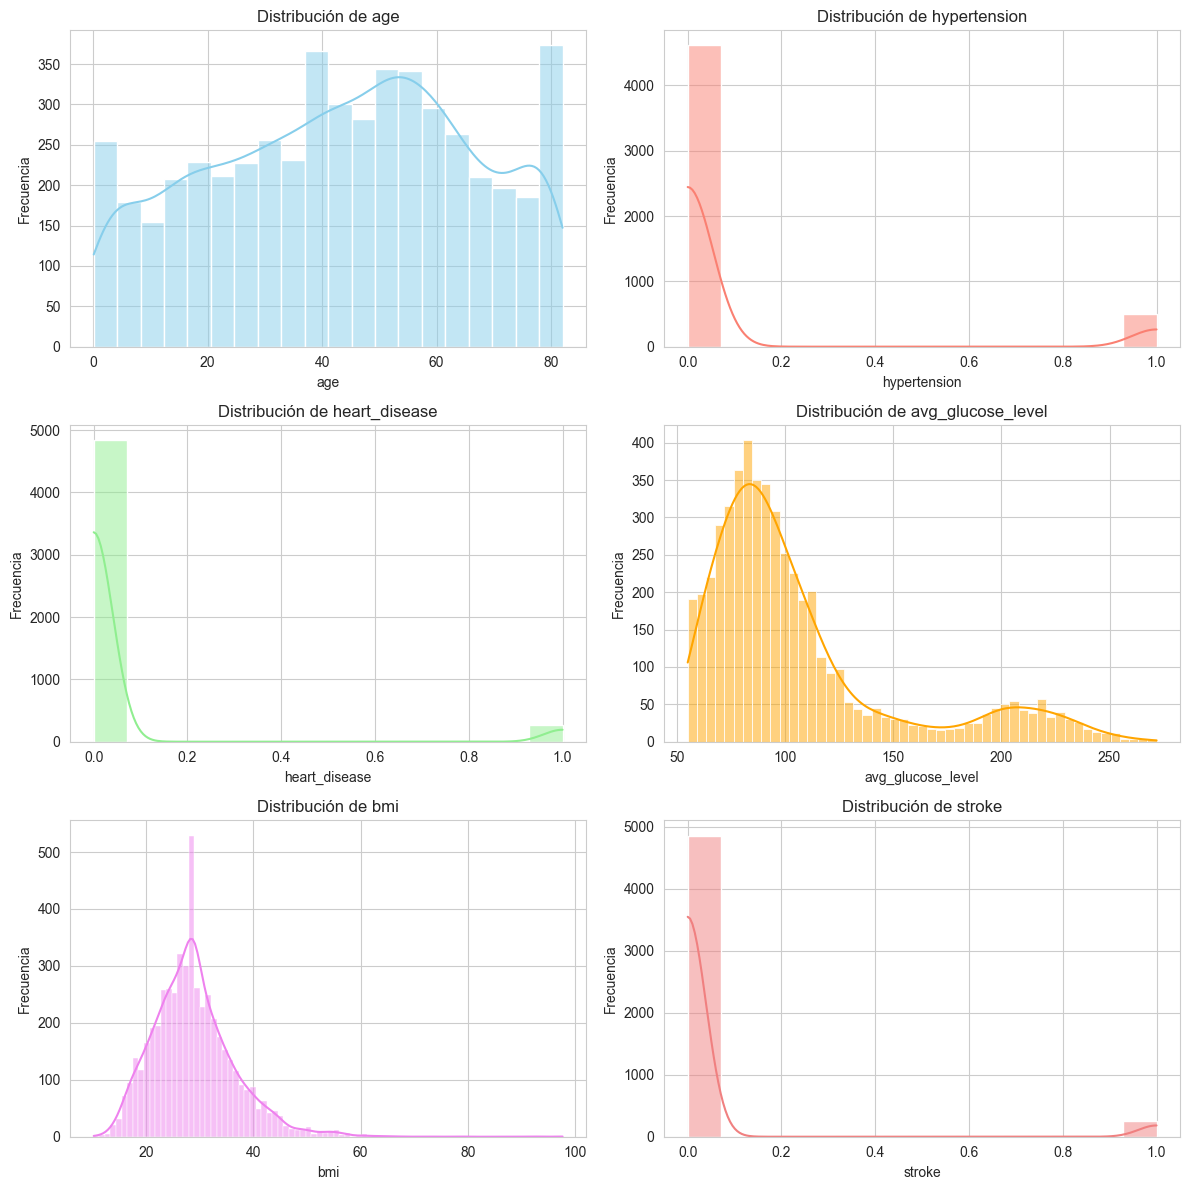

In [19]:
# Seleccionamos solo las columnas numéricas (int y float)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Eliminamos la columna 'id' ya que no es una variable útil para análisis estadístico
numeric_cols = numeric_cols.drop('id')

# Calculamos el número total de variables numéricas seleccionadas
num_vars = len(numeric_cols)

# Definimos el número de columnas por fila para los subplots
cols = 2  

# Calculamos el número de filas necesarias para acomodar todos los gráficos
rows = (num_vars + 1) // cols

# Definimos una lista de colores personalizados para los histogramas
custom_colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'violet', 'lightcoral', 'khaki']

# Ajustamos el tamaño general de la figura según la cantidad de filas
plt.figure(figsize=(12, rows * 4))

# Iteramos sobre cada variable numérica para crear su histograma
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[col], kde=True, color=custom_colors[i % len(custom_colors)])
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')


# Ajustamos el espacio entre los subplots para que no se sobrepongan
plt.tight_layout()

# Mostramos todos los gráficos
plt.show()

<div style="text-align:justify; line-height: 1.9; ">

La variable age muestra una distribución relativamente uniforme en adultos, con picos en los grupos de edad de 40 a 60 años y un aumento notorio hacia los extremos, principalmente en los adultos mayores. Se observan también frecuencias elevadas en los valores mínimos, lo que indica una concentración de pacientes pediátricos o jóvenes. Esta variable parece estar bien distribuida sin sesgos severos.

hypertension es una variable binaria que toma los valores 0 y 1. Como se observa en el gráfico, existe un fuerte desbalance: la mayoría de los individuos no presenta hipertensión. Heart_disease también es binaria y presenta una gran concentración en el valor 0, lo cual indica que la gran mayoría de los registros no tiene enfermedades cardíacas.

La variable avg_glucose_level presenta una distribución asimétrica a la derecha, lo que indica que la mayoría de las personas tienen niveles de glucosa promedio moderados, pero existe un grupo con niveles significativamente altos. Esto es coherente con casos de hiperglucemia o diabetes y también justifica por qué hay outliers válidos en esta variable. La curva de densidad muestra además una pequeña acumulación secundaria en valores altos, lo que podría representar un subgrupo con riesgo elevado.

La distribución de bmi es también asimétrica a la derecha, aunque en menor medida que la glucosa. La mayoría de los individuos tiene un IMC entre 20 y 35, con algunos valores elevados que representan casos de obesidad severa. 

stroke es nuestra variable objetivo, y representa si un individuo ha sufrido o no un accidente cerebrovascular. La distribución es altamente desbalanceada: la gran mayoría de los registros no ha sufrido un ACV, mientras que los casos positivos son escasos. Este desbalance es representa un desafío importante, ya que nuestrp modelo puede tender a predecir siempre la clase mayoritaria. Por ello, más adelante se aplicaran técnicas para balancear los datos.

</div>



#### Relación entre edad y el número de casos de stroke

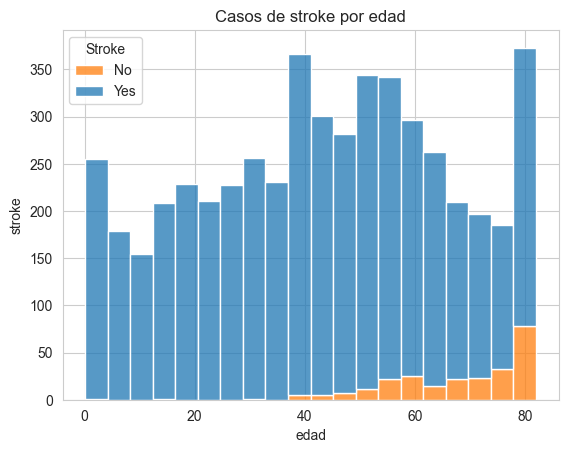

In [20]:
#Relación entre edad y número de casos de stroke
sns.histplot(data=df,x='age', hue='stroke',multiple='stack')
#Título del gráfico
plt.title('Casos de stroke por edad')
#Leyenda para identificar casos positivos y negativos
plt.legend(title='Stroke',labels={'Yes','No'})
#Título eje x
plt.xlabel('edad')
#Título eje y
plt.ylabel('stroke')
#Mostrar gráfico
plt.show()

<div style="text-align:justify; line-height: 1.9; ">

Se observa claramente que los casos positivos de stroke comienzan a aparecer con mayor frecuencia a partir de los 40 años, y su proporción aumenta significativamente en edades superiores, especialmente en personas mayores de 60 años. Por esta razón, la variable age es relevante para la predicción de accidentes cerebrovasculares. Su influencia directa sobre la probabilidad de sufrir un evento de este tipo la convierte en una de las variables predictoras más importantes dentro del conjunto de datos, por lo que se incluirá en los entrenamientos del modelo.

</div>

#### Examinando el desbalance en nuestra variable a predecir (strokes)

<div style="text-align:justify; line-height: 1.9; ">

Para comprender mejor la composición del conjunto de datos respecto a la variable objetivo stroke, se realizó primero un conteo de los casos positivos y negativos mediante el método value_counts(). Esto permitió identificar cuántos individuos del total han sufrido un accidente cerebrovascular (stroke = 1) y cuántos no (stroke = 0). Como resultado, se obtuvo que solo 249 de los 5110 registros (aproximadamente un 4.9%) presentan un caso de stroke, mientras que los 4861 restantes (95.1%) no han sufrido un ACV. Esta clara desproporción confirma que **la variable está altamente desbalanceada**.

</div>

In [21]:
#Contando casos positivos y negativos
stroke_counts = df['stroke'].value_counts()
stroke_counts

stroke
0    4861
1     249
Name: count, dtype: int64

<div style="text-align:justify; line-height: 1.9; ">

Para visualizar gráficamente esta distribución, se utilizó un gráfico de pastel que muestra la proporción de ambos grupos. En la gráfica, el segmento azul representa los casos sin stroke y ocupa el 95.1% del círculo, mientras que el otro segmento resalta los casos positivos los cuales ocupan el 4.9%.

</div>

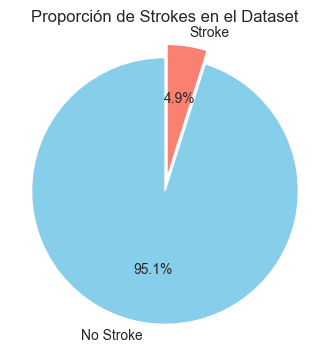

In [22]:
#Etiquetas por categoría
labels = ['No Stroke', 'Stroke']

#Definir colores
colors = ['skyblue', 'salmon']

#Destacar categoría
explode = [0, 0.1]  

#Tamaño del gráfico
plt.figure(figsize=(4,4))

#Creando gráfico
plt.pie(stroke_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)

#Título del gráfico
plt.title('Proporción de Strokes en el Dataset')

#Perfectamente circular
plt.axis('equal')  

#Mostrar gráfico
plt.show()

#### Relación entre Género y Probabilidad de Sufrir un Stroke

In [23]:
#Cuenta cuántos registros hay por categoría de genero
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [24]:
#Eliminamos la categoría other ya que solo es un registro y no es significativo para el modelo
df = df.drop(df[df['gender'] == 'Other'].index)

<div style="text-align:justify; line-height: 1.9; ">

A continuación, se calcula la proporción de personas que sufrieron stroke en cada género, dividiendo el número de casos positivos por el total de personas de ese grupo.

</div>

In [25]:
#Proporción de strokes por género
stroke_rate_gender = df.groupby('gender')['stroke'].mean()
stroke_rate_gender

gender
Female    0.047094
Male      0.051064
Name: stroke, dtype: float64

<div style="text-align:justify; line-height: 1.9; ">

Aunque la diferencia no es muy grande, se observa que los hombres tienen una tasa ligeramente mayor de stroke en este dataset, a pesar de tener menos registros. Asimismo, estimamos cuántos casos de stroke habría en cada grupo:

</div>

In [26]:
#Valores esperados por género
stroke_count_gender = stroke_rate_gender*df['gender'].value_counts()
stroke_count_gender

gender
Female    141.0
Male      108.0
dtype: float64

<div style="text-align:justify; line-height: 1.9; ">

A pesar de que la tasa en hombres es mayor, el número absoluto de strokes en mujeres es más alto, simplemente porque hay más mujeres en el dataset.

</div>

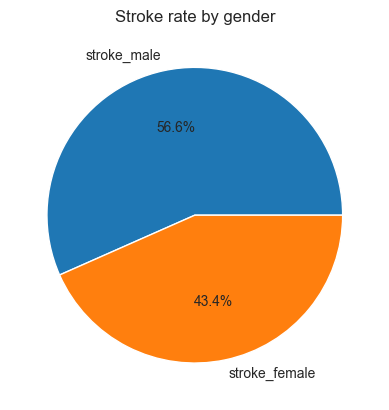

In [27]:
#Generar gráfico de pastel
plt.pie(stroke_count_gender,labels=['stroke_male','stroke_female'],autopct='%1.1f%%')
#Título del gráfico
plt.title('Stroke rate by gender')
#Mostrar el gráfico
plt.show()

#### Relación entre el Tabaquismo y la Incidencia de Stroke

<div style="text-align:justify; line-height: 1.9; ">

En esta parte se analiza la relación entre el estado de tabaquismo de los individuos y la incidencia de stroke en el conjunto de datos. Inicialmente, se utilizó value_counts() para observar la distribución de las categorías dentro de la variable smoking_status, encontrando que la mayoría de los pacientes nunca han fumado, seguidos por aquellos con estatus desconocido, exfumadores y fumadores actuales.

</div>

In [28]:
#Contando registros por categoría
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [29]:
#Calculando tasa promedio de stroke por categoría
stroke_rate_smoking = df.groupby('smoking_status')['stroke'].mean()
stroke_rate_smoking

smoking_status
Unknown            0.030440
formerly smoked    0.079186
never smoked       0.047569
smokes             0.053232
Name: stroke, dtype: float64

<div style="text-align:justify; line-height: 1.9; ">

Los resultados indican que el grupo con mayor tasa de stroke es el de personas que dejaron de fumar (formerly smoked), con un 7.92%, seguido por fumadores actuales (5.32%), personas que nunca fumaron (4.76%) y, finalmente, aquellos con estatus desconocido (3.04%). 

</div>

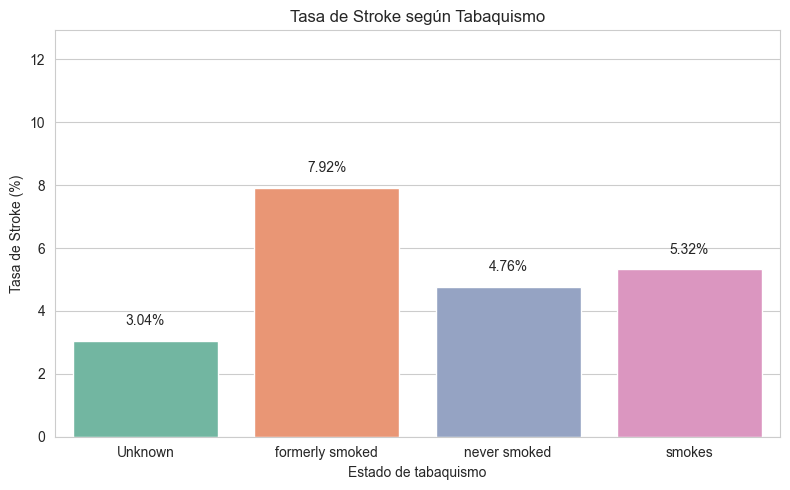

In [30]:
warnings.filterwarnings("ignore",category=FutureWarning)

#Convertir tasas a porcentajes
stroke_rate_percent = stroke_rate_smoking * 100

#Tmaño del gráfico
plt.figure(figsize=(8, 5))

#Construcción del gráfico
sns.barplot(x=stroke_rate_percent.index, y=stroke_rate_percent.values, palette='Set2')

#Título del gráfico
plt.title('Tasa de Stroke según Tabaquismo')
#Eje y del gráfico
plt.ylabel('Tasa de Stroke (%)')
#Eje x del gráfico
plt.xlabel('Estado de tabaquismo')
#Ajusta espacio
plt.ylim(0, stroke_rate_percent.max() + 5)

#Recorre barras para agregar datos
for i, val in enumerate(stroke_rate_percent.values):
    plt.text(i, val + 0.5, f'{val:.2f}%', ha='center')

#Ajusta gráficos
plt.tight_layout()

#Mostrar gráfico
plt.show()

<div style="text-align:justify; line-height: 1.9; ">

Es importante destacar que los exfumadores presentan una tasa notablemente más alta, lo cual podría reflejar secuelas acumuladas del consumo previo. Por lo tanto, esta variable tiene un papel predictivo importante para el modelo.

</div>

#### Impacto de la Hipertensión en la Incidencia de Stroke

<div style="text-align:justify; line-height: 1.9; ">

Se analiza la variable hypertension, que indica si una persona ha sido diagnosticada con presión arterial alta (1) o no (0). Mediante value_counts() se observó que el 90% de los registros corresponden a personas sin hipertensión, mientras que un 10% presenta esta condición. 

</div>

In [31]:
#Contar cuantos registros presentan hipertensión
df['hypertension'].value_counts()

hypertension
0    4611
1     498
Name: count, dtype: int64

<div style="text-align:justify; line-height: 1.9; ">

Se agruparon los datos por la presencia o ausencia de hipertensión y se calculó la media de la variable stroke para cada grupo, lo que representa la proporción de personas con stroke dentro de cada categoría. Los resultados muestran que solo el 3.97% de las personas sin hipertensión sufrieron un stroke, mientras que entre quienes sí tienen hipertensión la tasa se eleva al 13.25%. Por esta razón, consideraremos esta variable como predictora en nuestro modelo.

</div>

In [32]:
#Proporción de personas con stroke
stroke_rate_hypertension = df.groupby('hypertension')['stroke'].mean()
stroke_rate_hypertension

hypertension
0    0.039688
1    0.132530
Name: stroke, dtype: float64

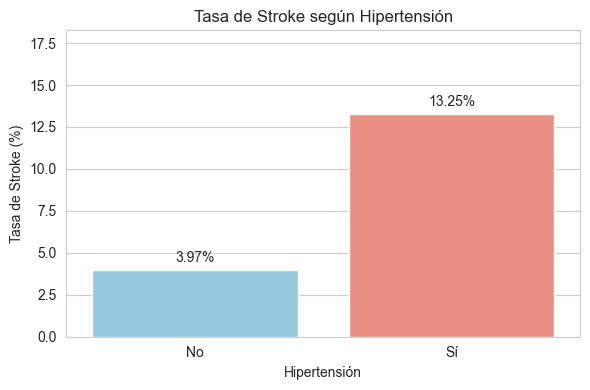

In [33]:
#Convertir a porcentaje
stroke_rate_percent = stroke_rate_hypertension * 100

#Tamaño del gráfico
plt.figure(figsize=(6, 4))

#Creando gráfico
sns.barplot(x=['No', 'Sí'], y=stroke_rate_percent.values, palette=['skyblue', 'salmon'])

#Título del gráfico
plt.title('Tasa de Stroke según Hipertensión')
#Eje x del gráfico
plt.xlabel('Hipertensión')
#Eje y del gráfico
plt.ylabel('Tasa de Stroke (%)')
#Ajustes de tamaño
plt.ylim(0, stroke_rate_percent.max() + 5)

# Agrega etiquetas de texto encima de cada barra con el valor porcentual
for i, val in enumerate(stroke_rate_percent.values):
    plt.text(i, val + 0.5, f'{val:.2f}%', ha='center')

plt.tight_layout()

#Mostrar gráfico
plt.show()

<div style="text-align:justify; line-height: 1.9; ">

La visualización mediante gráfico de barras permite ver con claridad la diferencia entre ambos grupos, destacando el mayor riesgo relativo de sufrir un stroke en personas con hipertensión. 

</div>

#### Niveles de Glucosa y la Presencia de Stroke

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

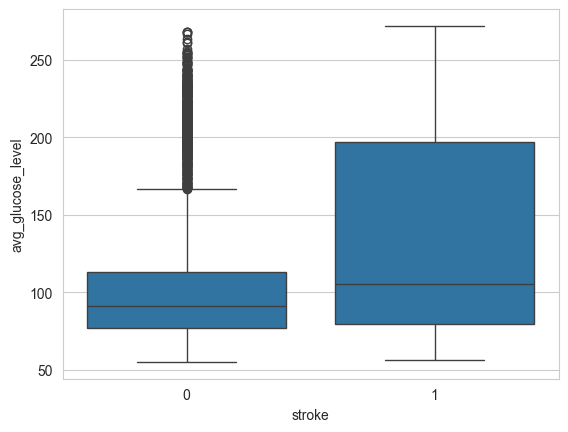

In [34]:
# Crea un diagrama de caja para visualizar la distribución de los niveles promedio de glucosa según si hubo o no un derrame cerebral
sns.boxplot(x='stroke',y='avg_glucose_level',data=df)

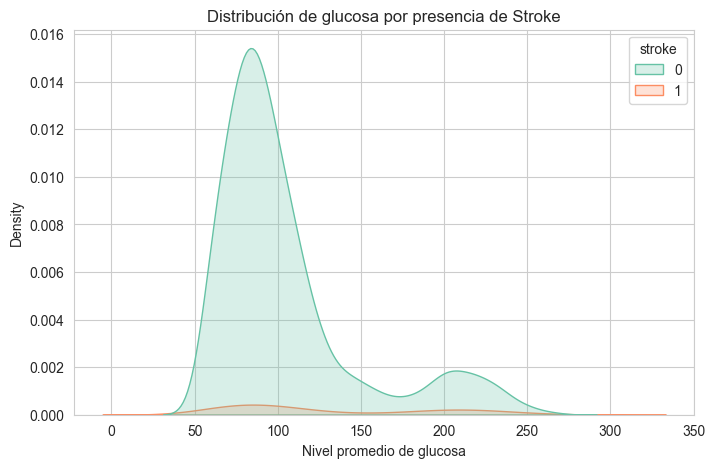

In [35]:
# Grafica la distribución del nivel promedio de glucosa diferenciada por presencia de stroke, usando KDE (estimación de densidad)
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', fill=True, palette='Set2')
plt.title('Distribución de glucosa por presencia de Stroke')
plt.xlabel('Nivel promedio de glucosa')
plt.show()


### 1.6 Codificación de variables categóricas

<div style="text-align:justify; line-height: 1.9; ">

En esta etapa se realiza la codificación de variables categóricas mediante la técnica de one-hot encoding utilizando pd.get_dummies. Este proceso consiste en transformar las variables en nuevas columnas binarias que indican la presencia o ausencia de cada categoría. Se usa el parámetro drop_first=True para evitar la trampa de las variables ficticias, lo cual elimina una de las categorías por cada variable y evita colinealidad en modelos lineales. Luego, se eliminan las columnas originales. Finalmente, las columnas booleanas resultantes se convierten explícitamente a tipo entero para asegurar compatibilidad con algoritmos de machine learning que no aceptan valores booleanos directamente.

</div>

In [36]:
# Combina el DataFrame original con las variables dummy

df = pd.concat([
    df,
    pd.get_dummies(df['gender'], prefix='gender', drop_first=True),
    pd.get_dummies(df['ever_married'], prefix='married', drop_first=True),
    pd.get_dummies(df['Residence_type'], prefix='residence', drop_first=True),
    pd.get_dummies(df['work_type'], prefix='work', drop_first=True),
    pd.get_dummies(df['smoking_status'], prefix='smoke', drop_first=True)
], axis=1)


# Elimina las columnas originales categóricas ya que ahora están codificadas como dummie
df.drop(['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status'], axis=1, inplace=True)

# Convierte todas las columnas de tipo booleano (True/False) a enteros (1/0)
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})



In [37]:
#Verificar que se realizaron las transformaciones
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,married_Yes,residence_Urban,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,1,1,0,1,0,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,1,0,0,0,1,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,1,1,0,1,0,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,1,0,0,0,1,0,0,1,0


In [38]:
#Antes de realizar correlaciones, eliminamos la columna id ya que no es significativo en el análisis
df.drop('id',axis=1,inplace=True)

#### Matriz de correlación con valores p

<div style="text-align:justify; line-height: 1.9; ">

En esta sección se calculó una matriz de correlación de Pearson entre todas las variables numéricas del dataset, incluyendo aquellas codificadas mediante one-hot encoding. Además de los coeficientes de correlación 𝑟, también se calcularon los valores-p asociados a cada par, utilizando la función stats.pearsonr de scipy, lo que permite evaluar la significancia estadística de cada correlación. Para facilitar su interpretación, se generó un mapa de calor que muestra en cada celda el valor de 𝑟 junto con su correspondiente p-value en notación científica.

Este análisis no solo permite identificar relaciones lineales entre variables, sino también determinar qué correlaciones son estadísticamente significativas (p < 0.05).Se puede observar que ciertas variables relacionadas con el estado de salud como hipertención, niveles de glucosa y otras **tienen correlaciones débiles pero significativas con la variable stroke**, lo cual es coherente con el comportamiento clínico esperado, ya que en medicina, se sabe que la hipertensión, la diabetes y las enfermedades cardíacas aumentan el riesgo de ACV, pero no son los únicos factores. Por tanto, no esperamos una correlación perfecta o fuerte (porque hay muchas otras causas), pero sí esperamos ver alguna asociación.

</div>

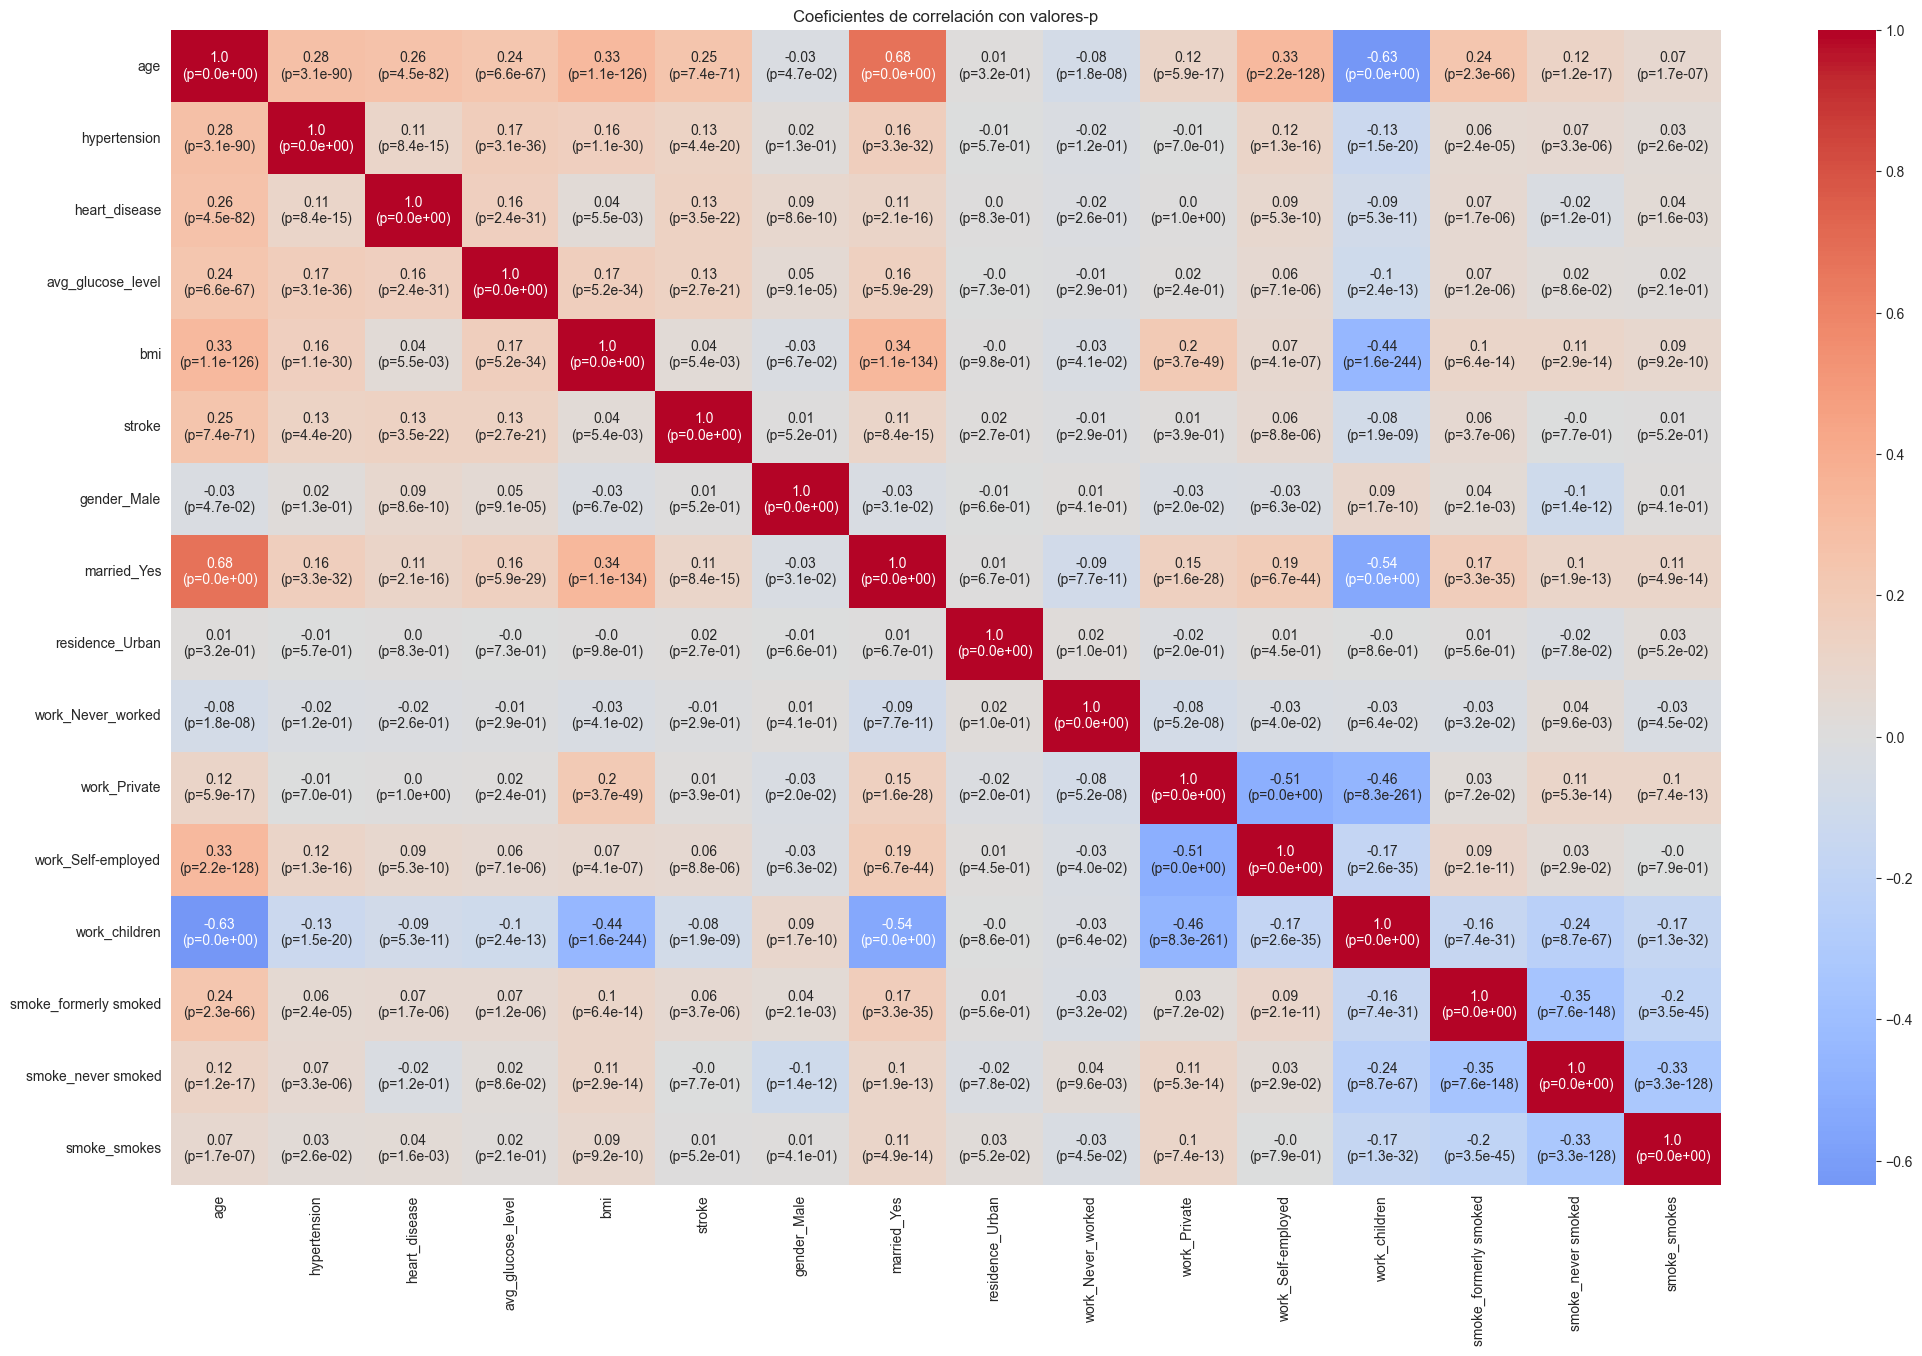

In [39]:
from scipy import stats

#Función para crear matriz de correlación con p-valores y coeficientes de correlación
def corr_pvalues(data):
    data = data.dropna()
    df_cols = data.select_dtypes(include=[np.number]).columns
    pvals = pd.DataFrame(np.ones((len(df_cols), len(df_cols))), columns=df_cols, index=df_cols)
    r_vals = pd.DataFrame(np.ones((len(df_cols), len(df_cols))), columns=df_cols, index=df_cols)
    for col1 in df_cols:
        for col2 in df_cols:
            r, p = stats.pearsonr(data[col1], data[col2])
            pvals.loc[col1, col2] = p
            r_vals.loc[col1, col2] = r
    return r_vals, pvals

r_vals, p_vals = corr_pvalues(df)

#Notación científica para los p-valores
annot = r_vals.round(2).astype(str) + "\n(p=" + p_vals.applymap(lambda x: f"{x:.1e}") + ")"

#Tamaño
plt.figure(figsize=(25, 15))

#Mapa de calor
sns.heatmap(r_vals.astype(float), annot=annot, fmt='', cmap='coolwarm', center=0)

#Título
plt.title('Coeficientes de correlación con valores-p')

#Mostrar gráfico
plt.show()

<div style="text-align:justify; line-height: 1.9; ">

A partir de los resultados obtenidos en la matriz de correlación, se extrajeron específicamente los coeficientes 𝑟 r y los valores-p asociados a la variable objetivo stroke, con el fin de determinar qué variables están significativamente correlacionadas con ella.

Estas **variables con correlaciones significativas**, aunque de magnitud débil en muchos casos, **serán tomadas con mayor atención en el proceso de modelado**, ya que presentan una evidencia estadística real de asociación con la ocurrencia de un accidente cerebrovascular. Por otro lado, aquellas variables sin correlación significativa las consideraremos candidatas a ser descartadas o recibir menos prioridad en la selección de variables predictoras.

</div>

In [40]:
alpha = 0.05

#Obtener los p-valores relacionados con 'strokes'
stroke_pvals = p_vals['stroke'].drop('stroke')  
stroke_corrs = r_vals['stroke'].drop('stroke')

#Variables significativamente correlacionadas
significativas = stroke_pvals[stroke_pvals < alpha]

#Variables no significativamente correlacionadas
no_significativas = stroke_pvals[stroke_pvals >= alpha]

#Imprimir lista
print("Variables con correlación significativa con 'stroke':\n")
for var in significativas.index:
    print(f"- {var}: r = {stroke_corrs[var]:.2f}, p = {stroke_pvals[var]:.3e}")

#Imprimir lista
print("\nVariables SIN correlación significativa con 'stroke':\n")
for var in no_significativas.index:
    print(f"- {var}: r = {stroke_corrs[var]:.2f}, p = {stroke_pvals[var]:.3e}")


Variables con correlación significativa con 'stroke':

- age: r = 0.25, p = 7.435e-71
- hypertension: r = 0.13, p = 4.441e-20
- heart_disease: r = 0.13, p = 3.507e-22
- avg_glucose_level: r = 0.13, p = 2.705e-21
- bmi: r = 0.04, p = 5.407e-03
- married_Yes: r = 0.11, p = 8.368e-15
- work_Self-employed: r = 0.06, p = 8.767e-06
- work_children: r = -0.08, p = 1.911e-09
- smoke_formerly smoked: r = 0.06, p = 3.709e-06

Variables SIN correlación significativa con 'stroke':

- gender_Male: r = 0.01, p = 5.164e-01
- residence_Urban: r = 0.02, p = 2.706e-01
- work_Never_worked: r = -0.01, p = 2.874e-01
- work_Private: r = 0.01, p = 3.940e-01
- smoke_never smoked: r = -0.00, p = 7.661e-01
- smoke_smokes: r = 0.01, p = 5.238e-01


## 2. Entrenamiento del modelo

In [41]:
#Visualizar el nombre de las columnas para evitar errores
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'married_Yes', 'residence_Urban',
       'work_Never_worked', 'work_Private', 'work_Self-employed',
       'work_children', 'smoke_formerly smoked', 'smoke_never smoked',
       'smoke_smokes'],
      dtype='object')

<div style="text-align:justify; line-height: 1.9; ">

En esta sección se seleccionan las variables predictoras que serán utilizadas para entrenar el modelo. Las columnas incluidas en X corresponden a aquellas que previamente mostraron una correlación significativa con la variable objetivo stroke. Por su parte, la variable y contiene la columna stroke, que indica si el individuo ha sufrido un accidente cerebrovascular o no.

</div>

In [42]:
X = df[['age','hypertension','heart_disease','avg_glucose_level','bmi','married_Yes',
            'work_Self-employed','smoke_formerly smoked','smoke_smokes']]
y = df['stroke']

<div style="text-align:justify; line-height: 1.9; ">

A continuación, se divide el conjunto de datos en entrenamiento y prueba utilizando la función train_test_split. Dado que la variable objetivo está altamente desbalanceada, **se aplica la técnica SMOTE (Synthetic Minority Over-sampling Technique)** sobre los datos de entrenamiento. Esta técnica genera ejemplos sintéticos de la clase minoritaria (personas que sí han sufrido un ACV), logrando un conjunto de entrenamiento completamente balanceado. Como resultado, se obtiene un nuevo conjunto donde ambas clases tienen la misma cantidad de observaciones, lo que facilitará el aprendizaje del modelo y **evitará sesgos hacia la clase mayoritaria**.

</div>

In [43]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())


stroke
0    3888
1    3888
Name: count, dtype: int64


### 2.1 Implementación regresión logística con descenso de gradiente

<div style="text-align:justify; line-height: 1.9; ">

#### Fundamentos Matemáticos de la Regresión Logística con Descenso de Gradiente

---

Dado un vector de características $ \mathbf{x} \in \mathbb{R}^n $, pesos $ \mathbf{w} \in \mathbb{R}^n $, y un sesgo $ b \in \mathbb{R} $, se calcula:

$$
z = \mathbf{w}^\top \mathbf{x} + b
$$

---

La probabilidad estimada de que $ y = 1 $ está dada por la **función sigmoide**:

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Esto transforma la salida del modelo lineal en una probabilidad entre 0 y 1.

---

**Función de pérdida logística (log-loss)**

La función de pérdida que se quiere minimizar es la **log-loss**:

$$
\mathcal{L}(\mathbf{w}, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

donde:

- $ \hat{y}^{(i)} = \sigma(\mathbf{w}^\top \mathbf{x}^{(i)} + b) $
- $ m $ es el número de ejemplos de entrenamiento
- $ y^{(i)} \in \{0, 1\} $

---

**Cálculo del gradiente**

Para minimizar la pérdida, usamos **descenso de gradiente**, que requiere las derivadas parciales de la función de pérdida respecto a $ \mathbf{w} $ y $ b $:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) \mathbf{x}^{(i)} = \frac{1}{m} \mathbf{X}^\top (\hat{\mathbf{y}} - \mathbf{y})
$$

$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})
$$

---

**Actualización de parámetros**

Los parámetros del modelo se actualizan iterativamente con las siguientes fórmulas:

$$
\mathbf{w} := \mathbf{w} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{w}}, \quad
b := b - \alpha \cdot \frac{\partial \mathcal{L}}{\partial b}
$$

donde $ \alpha $ es la **tasa de aprendizaje** (*learning rate*).

---

**Predicción**

Una vez entrenado el modelo, se puede predecir la probabilidad de clase positiva como:

$$
\hat{y} = \sigma(\mathbf{w}^\top \mathbf{x} + b)
$$

Y para convertir esta probabilidad en una **predicción binaria** (0 o 1), se aplica un **umbral de decisión** de 0.5:

$$
\hat{y}_{\text{clase}} =
\begin{cases}
1 & \text{si } \hat{y} \geq 0.5 \\
0 & \text{si } \hat{y} < 0.5
\end{cases}
$$

---

</div>


In [44]:
class LogisticRegressionGradientDescent:
    def __init__(self, n_iterations=1000, learning_rate=0.01):
        self.weights = None
        self.intercept = None
        self.n_iterations = n_iterations
        self.lr = learning_rate
        self.errors = []

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _loss(self, y_true, y_pred):
        epsilon = 1e-15  
        return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

    def _gradient_descent(self, X, y_true, y_pred):
        n_samples = X.shape[0]
        dw = np.dot(X.T, (y_pred - y_true)) / n_samples
        db = np.sum(y_pred - y_true) / n_samples
        self.weights -= self.lr * dw
        self.intercept -= self.lr * db

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.intercept = 0

        for _ in range(self.n_iterations):
            linear_output = np.dot(X, self.weights) + self.intercept
            y_pred = self._sigmoid(linear_output)
            loss = self._loss(y, y_pred)
            self.errors.append(loss)
            self._gradient_descent(X, y, y_pred)

    def predict_proba(self, X):
        return self._sigmoid(np.dot(X, self.weights) + self.intercept)

    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)



In [45]:
# Escalar datos primero
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train_balanced.values)


In [47]:
#Predecir
y_pred = model.predict(X_test_scaled)


In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.7407045009784736
Matriz de confusión:
 [[719 253]
 [ 12  38]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       972
           1       0.13      0.76      0.22        50

    accuracy                           0.74      1022
   macro avg       0.56      0.75      0.53      1022
weighted avg       0.94      0.74      0.81      1022



<div style="text-align:justify; line-height: 1.9; ">

En este ejemplo se observa un rendimiento destacable del modelo en cuanto a la detección de casos positivos de stroke, logrando un recall de 0.76 en la clase minoritaria, lo que significa que el modelo está identificando correctamente la mayoría de los casos reales de accidente cerebrovascular. Sin embargo, esto se produce a costa de una baja precisión, lo que indica una alta proporción de falsos positivos. Este tipo de comportamiento puede ser aceptable en contextos clínicos donde es preferible prevenir antes que omitir un caso grave, aunque se produzcan algunas falsas alarmas. 

A partir de este punto, se continuará probando múltiples combinaciones de variables predictoras, tanto desde enfoques clínicos como sociales y de estilo de vida, con el objetivo de encontrar un modelo que ofrezca el mejor equilibrio posible entre recall, precisión y exactitud, priorizando siempre la correcta detección de casos positivos.

</div>

### 2.2 Análisis de Desempeño por Subconjuntos de Variables

In [49]:
#lista para comparar los mejores modelos
resultados_modelos = []

In [50]:
X = df[['age','hypertension','heart_disease','bmi','married_Yes',
           'work_Self-employed','smoke_formerly smoked','smoke_smokes']]
#X = df.drop(columns=['stroke'])
y = df['stroke']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())

# Escalar datos primero
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train_balanced.values)

#Predecir
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

stroke
0    3888
1    3888
Name: count, dtype: int64
Accuracy: 0.7064579256360078
Matriz de confusión:
 [[683 289]
 [ 11  39]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.70      0.82       972
           1       0.12      0.78      0.21        50

    accuracy                           0.71      1022
   macro avg       0.55      0.74      0.51      1022
weighted avg       0.94      0.71      0.79      1022



In [51]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    classification_report
)

X = df.drop(columns=['stroke'])
y = df['stroke']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())

# Escalar datos primero
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train_balanced.values)

#Predecir
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Calcular métricas
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fp = cm[0][1]  # Falsos positivos
fn = cm[1][0]  # Falsos negativos

# Agregar a la lista de resultados
resultados_modelos.append({
    'Modelo': 'Modelo 1', 
    'Accuracy': acc,
    'Recall Clase 1': recall,
    'Precisión Clase 1': precision,
    'F1-score Clase 1': f1,
    'Falsos Positivos': fp,
    'Falsos Negativos': fn
})

stroke
0    3888
1    3888
Name: count, dtype: int64
Accuracy: 0.8062622309197651
Matriz de confusión:
 [[793 179]
 [ 19  31]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89       972
           1       0.15      0.62      0.24        50

    accuracy                           0.81      1022
   macro avg       0.56      0.72      0.56      1022
weighted avg       0.94      0.81      0.86      1022



In [52]:
X = df[['age','hypertension','heart_disease','avg_glucose_level','bmi','married_Yes',
            'work_Self-employed','smoke_formerly smoked','work_children','smoke_smokes']]
y = df['stroke']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())

# Escalar datos primero
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train_balanced.values)

#Predecir
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

stroke
0    3888
1    3888
Name: count, dtype: int64
Accuracy: 0.7270058708414873
Matriz de confusión:
 [[705 267]
 [ 12  38]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.73      0.83       972
           1       0.12      0.76      0.21        50

    accuracy                           0.73      1022
   macro avg       0.55      0.74      0.52      1022
weighted avg       0.94      0.73      0.80      1022



In [53]:
X = df[['age', 'heart_disease', 'hypertension', 'avg_glucose_level',
     'married_Yes', 'smoke_formerly smoked']]
y = df['stroke']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())

# Escalar datos primero
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train_balanced.values)

#Predecir
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

stroke
0    3888
1    3888
Name: count, dtype: int64
Accuracy: 0.726027397260274
Matriz de confusión:
 [[704 268]
 [ 12  38]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83       972
           1       0.12      0.76      0.21        50

    accuracy                           0.73      1022
   macro avg       0.55      0.74      0.52      1022
weighted avg       0.94      0.73      0.80      1022



In [54]:
X = df[['age', 'bmi', 'smoke_formerly smoked', 'smoke_never smoked', 'smoke_smokes']]
y = df['stroke']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())

# Escalar datos primero
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train_balanced.values)

#Predecir
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

stroke
0    3888
1    3888
Name: count, dtype: int64
Accuracy: 0.7426614481409002
Matriz de confusión:
 [[719 253]
 [ 10  40]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85       972
           1       0.14      0.80      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.74      0.82      1022



In [55]:
X = df[['age', 'bmi', 'smoke_formerly smoked', 'smoke_never smoked', 'smoke_smokes','avg_glucose_level']]
y = df['stroke']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())

# Escalar datos primero
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train_balanced.values)

#Predecir
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Calcular métricas
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fp = cm[0][1]  # Falsos positivos
fn = cm[1][0]  # Falsos negativos

# Agregar a la lista de resultados
resultados_modelos.append({
    'Modelo': 'Modelo 2',  
    'Accuracy': acc,
    'Recall Clase 1': recall,
    'Precisión Clase 1': precision,
    'F1-score Clase 1': f1,
    'Falsos Positivos': fp,
    'Falsos Negativos': fn
})

stroke
0    3888
1    3888
Name: count, dtype: int64
Accuracy: 0.7681017612524462
Matriz de confusión:
 [[745 227]
 [ 10  40]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      0.77      0.86       972
           1       0.15      0.80      0.25        50

    accuracy                           0.77      1022
   macro avg       0.57      0.78      0.56      1022
weighted avg       0.95      0.77      0.83      1022



In [56]:
X = df[['age', 'bmi', 'smoke_formerly smoked', 'smoke_never smoked', 'smoke_smokes','avg_glucose_level','gender_Male']]
y = df['stroke']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())

# Escalar datos primero
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train_balanced.values)

#Predecir
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Calcular métricas
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fp = cm[0][1]  # Falsos positivos
fn = cm[1][0]  # Falsos negativos

# Agregar a la lista de resultados
resultados_modelos.append({
    'Modelo': 'Modelo 3', 
    'Accuracy': acc,
    'Recall Clase 1': recall,
    'Precisión Clase 1': precision,
    'F1-score Clase 1': f1,
    'Falsos Positivos': fp,
    'Falsos Negativos': fn
})

stroke
0    3888
1    3888
Name: count, dtype: int64
Accuracy: 0.7827788649706457
Matriz de confusión:
 [[764 208]
 [ 14  36]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.79      0.87       972
           1       0.15      0.72      0.24        50

    accuracy                           0.78      1022
   macro avg       0.56      0.75      0.56      1022
weighted avg       0.94      0.78      0.84      1022



In [57]:
# X = df[['age', 'bmi', 'smoke_formerly smoked', 'smoke_never smoked', 'smoke_smokes','gender_Male','hypertension']]
#X = df[['age', 'bmi', 'smoke_formerly smoked', 'smoke_never smoked', 'smoke_smokes', 'avg_glucose_level', 'work_Self-employed','hypertension','heart_disease']]
#X = df[['age', 'smoke_formerly smoked', 'smoke_never smoked', 'smoke_smokes', 'avg_glucose_level', 'gender_Male', 'hypertension','heart_disease']]
#godX = df[['age', 'bmi', 'smoke_formerly smoked', 'smoke_never smoked', 'smoke_smokes', 'avg_glucose_level', 'hypertension']]
X = df[['age', 'bmi', 'avg_glucose_level', 'smoke_formerly smoked', 'smoke_smokes']]
y = df['stroke']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())

# Escalar datos primero
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train_balanced.values)

#Predecir
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

stroke
0    3888
1    3888
Name: count, dtype: int64
Accuracy: 0.7328767123287672
Matriz de confusión:
 [[711 261]
 [ 12  38]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.73      0.84       972
           1       0.13      0.76      0.22        50

    accuracy                           0.73      1022
   macro avg       0.56      0.75      0.53      1022
weighted avg       0.94      0.73      0.81      1022



In [58]:
X = df[['age', 'bmi', 'smoke_formerly smoked', 'smoke_never smoked', 'smoke_smokes','avg_glucose_level','residence_Urban']]
y = df['stroke']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())

# Escalar datos primero
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train_balanced.values)

#Predecir
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

stroke
0    3888
1    3888
Name: count, dtype: int64
Accuracy: 0.7818003913894325
Matriz de confusión:
 [[766 206]
 [ 17  33]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.79      0.87       972
           1       0.14      0.66      0.23        50

    accuracy                           0.78      1022
   macro avg       0.56      0.72      0.55      1022
weighted avg       0.94      0.78      0.84      1022



In [59]:
X = df[['smoke_never smoked','married_Yes','avg_glucose_level', 'bmi','age']]
y = df['stroke']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_balanced.value_counts())

# Escalar datos primero
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Entrenar
model = LogisticRegressionGradientDescent(n_iterations=500, learning_rate=0.01)
model.fit(X_train_scaled, y_train_balanced.values)

#Predecir
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

stroke
0    3888
1    3888
Name: count, dtype: int64
Accuracy: 0.7123287671232876
Matriz de confusión:
 [[687 285]
 [  9  41]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      0.71      0.82       972
           1       0.13      0.82      0.22        50

    accuracy                           0.71      1022
   macro avg       0.56      0.76      0.52      1022
weighted avg       0.94      0.71      0.79      1022



### 3.3 Comparación de los tres mejores modelos con base a su accuracy y recall de clase 1 

In [60]:
df_resultados = pd.DataFrame(resultados_modelos)
display(df_resultados)

,Modelo,Accuracy,Recall Clase 1,Precisión Clase 1,F1-score Clase 1,Falsos Positivos,Falsos Negativos
0,Modelo 1,0.806262,0.62,0.147619,0.238462,179,19
1,Modelo 2,0.768102,0.80,0.149813,0.252366,227,10
2,Modelo 3,0.782779,0.72,0.147541,0.244898,208,14


<div style="text-align:justify; line-height: 1.9; ">

## 4. Selección del mejor modelo según los objetivos del problema

El problema abordado consiste en predecir si un paciente sufrirá un derrame cerebral, una condición médica grave en la que **la prioridad principal es identificar correctamente los casos positivos** (personas que realmente están en riesgo), incluso si eso implica generar algunos falsos positivos.

#### Objetivo principal:
- **Minimizar los falsos negativos (FN)**: es decir, **reducir al mínimo los casos en los que el modelo predice "no hay riesgo" cuando en realidad sí lo hay**.
- En este tipo de problemas de salud, **un falso negativo podría significar no atender a tiempo una condición crítica**, mientras que un falso positivo solo implicaría una evaluación adicional.

### Justificación de la selección

Se elige **Modelo 2** como el más adecuado para este caso de uso por las siguientes razones:

- **Es el que menos falsos negativos tiene (10)**, lo cual cumple directamente con el objetivo de evitar que pacientes en riesgo pasen desapercibidos.
- **Tiene el mayor recall para la Clase 1 (0.80)**, lo que significa que **detecta correctamente el 80% de los casos reales de stroke**. Esto es crítico en un entorno clínico donde cada caso detectado puede representar una vida salvada.
- **Su F1-score (0.2533)**, que equilibra precisión y recall, es el mayor entre los modelos comparados.
- Aunque tiene más falsos positivos, esto es un **compromiso aceptable** en un contexto médico, ya que una persona sana que recibe una falsa alerta puede someterse a un chequeo sin consecuencias graves, mientras que un falso negativo puede ser letal.

</div>


In [61]:
X = df[['age', 'bmi', 'smoke_formerly smoked', 'smoke_never smoked', 'smoke_smokes','avg_glucose_level']]
y = df['stroke']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Escalar datos primero
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Entrenar
model2 = LogisticRegressionGradientDescent(n_iterations=750, learning_rate=0.01)
model2.fit(X_train_scaled, y_train_balanced.values)

#Predecir
y_pred = model2.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.7749510763209393
Matriz de confusión:
 [[753 219]
 [ 11  39]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      0.77      0.87       972
           1       0.15      0.78      0.25        50

    accuracy                           0.77      1022
   macro avg       0.57      0.78      0.56      1022
weighted avg       0.94      0.77      0.84      1022



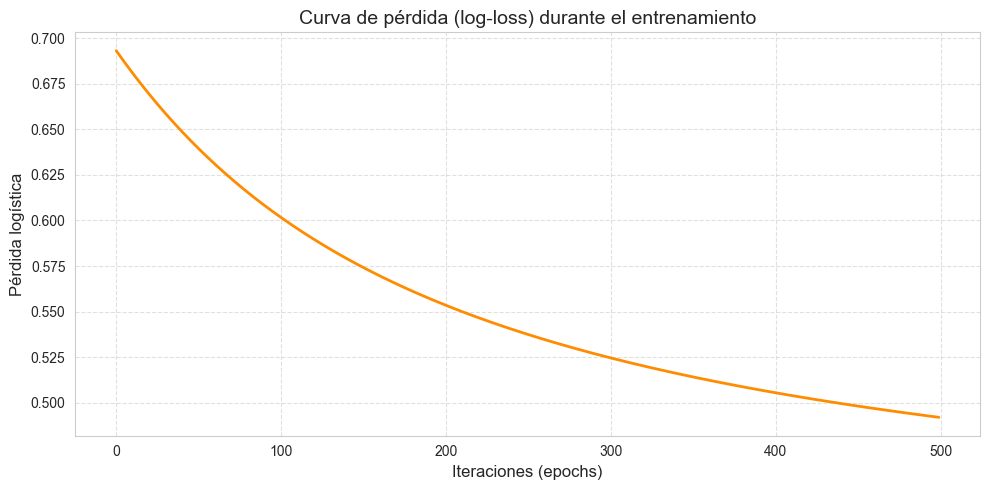

In [62]:
# Grafica la curva de pérdida logística (log-loss) durante el entrenamiento del modelo
plt.figure(figsize=(10, 5))
plt.plot(range(len(model.errors)), model.errors, color='darkorange', linewidth=2)
plt.title('Curva de pérdida (log-loss) durante el entrenamiento', fontsize=14)
plt.xlabel('Iteraciones (epochs)', fontsize=12)
plt.ylabel('Pérdida logística', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<div style="text-align:justify; line-height: 1.9; ">

Tras probar diversas combinaciones de **número de iteraciones** y **tasas de aprendizaje**, se seleccionó como modelo final el que utiliza:

- **Tasa de aprendizaje**: η = 0.01  
- **Número de iteraciones**: 750

Este modelo fue elegido debido a los siguientes aspectos clave:

El modelo alcanzó un equilibrio ideal entre las métricas más relevantes para el contexto de predicción de enfermedades como el ACV:

- **Recall Clase 1**: 0.78
  Esta métrica es crítica en problemas médicos, ya que indica qué tan bien el modelo identifica los casos positivos reales. Minimizar los **falsos negativos** es prioritario para no omitir pacientes en riesgo.

- **Precisión Clase 1**: 0.15 
  Aunque baja, es esperable en problemas desbalanceados. En este caso, se toleran falsos positivos con tal de no ignorar verdaderos casos de riesgo.

- **F1-Score Clase 1**: 0.25
  Este valor representa un balance entre precisión y recall, siendo superior al de otras configuraciones evaluadas.

La **curva de pérdida logística (log-loss)** muestra una tendencia descendente suave, sin señales de oscilaciones abruptas ni estancamientos. Esto refleja una convergencia estable del modelo.

</div>

<div style="text-align:justify; line-height: 1.9; ">

### Limitaciones en la predicción de  stroke según los análisis realizados

Aunque se han obtenido modelos razonablemente buenos, **mejorar significativamente su desempeño es complejo** debido a la naturaleza de los datos disponibles. 

En el análisis de correlación, observó que La variable objetivo stroke **tiene correlaciones débiles con todas las variables independientes**. Las correlaciones más altas están en torno a:
  - age: 0.25
  - hypertension: 0.08
  - heart_disease: 0.13
  - avg_glucose_level: 0.13
  - bmi: 0.04
  
- Muchas variables categóricas transformadas muestran correlaciones **cercanas a cero** con la variable objetivo.Incluso variables que intuitivamente deberían estar relacionadas, como  hipertensión o enfermedades cardíacas, tienen **correlaciones muy bajas**, lo cual sugiere que su impacto individual es limitado en el modelo.

</div>


In [ ]:
# Guardado de modelo de regresión logistica y recursos asociados

import joblib
joblib.dump(model2, "logistic_model.pkl")
joblib.dump(scaler, "scaler_logistic.pkl")

['scaler_logistic.pkl']